In [1]:
using Quantikz

## Any array of `QuantikzOp`s is automatically rendered inline

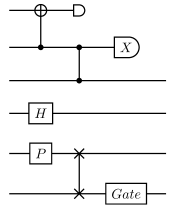

In [2]:
[
    CNOT(2,1),
    CPHASE(2,3),
    H(4),P(5),
    SWAP(5,6),
    U("Gate",6),
    Measurement(1),
    Measurement("X",2)
]

## `show` or `displaycircuit` also have the `mode` (`:compressed` vs `:expanded`) and `scale` parameters.

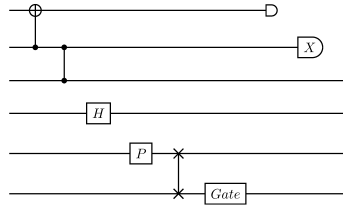

In [3]:
displaycircuit(
    [CNOT(2,1),
     CPHASE(2,3),
     H(4),P(5),
     SWAP(5,6),
     U("Gate",6),
     Measurement(1),
     Measurement("X",2)
    ],
    mode=:expanded
)

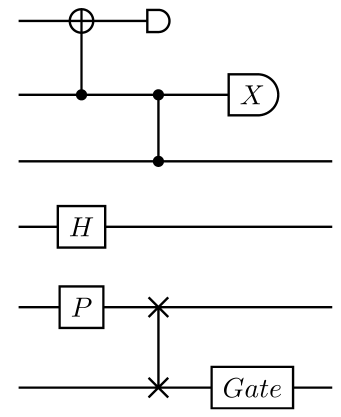

In [4]:
displaycircuit(
    [CNOT(2,1),
     CPHASE(2,3),
     H(4),P(5),
     SWAP(5,6),
     U("Gate",6),
     Measurement(1),
     Measurement("X",2)
    ],
    mode=:compressed, # the default
    scale=2 # default of 1
)

## `MultiControl` lets you make unrealistic arbitrary multiqubit ops

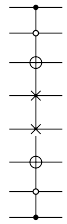

In [5]:
MultiControl([1,8],[2,7],[3,6],[4,5])

## `MultiControlU` lets you make controlled gates with arbitrary names

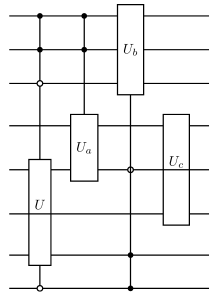

In [6]:
[
    MultiControlU("U",[1,2],[3,8],[5,7]),
    MultiControlU("U_a",[1,2],[],[4,5]),
    MultiControlU("U_b",[7,8],[5],[1,2,3]),
    MultiControlU("U_c",[],[],[4,6])
]

## `Noise` and `NoiseAll` are convenient to denote noise event

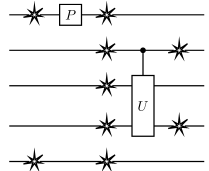

In [7]:
[
    Noise([1,5]),
    P(1),
    NoiseAll(),
    MultiControlU("U",[2],[],[3,4]),
    Noise([2,4]),
]

## Use `circuit2table` to inspect the TeX code

In [8]:
table = circuit2table(
    [CNOT(2,1),
     CPHASE(2,3),
     H(4),P(5),
     SWAP(5,6),
     U("Gate",6),
     Measurement(1),
     Measurement("X",2)
    ],
    mode=:compressed
)

6×5 Matrix{String}:
 "\\qw"  "\\targ{}\\vqw{0}"  "\\meterD{}"  ""              ""
 "\\qw"  "\\ctrl{-1}"        "\\ctrl{0}"   "\\meterD{X}"   ""
 "\\qw"  "\\qw"              "\\ctrl{-1}"  "\\qw"          "\\qw"
 "\\qw"  "\\gate{H}"         "\\qw"        "\\qw"          "\\qw"
 "\\qw"  "\\gate{P}"         "\\swap{0}"   "\\qw"          "\\qw"
 "\\qw"  "\\qw"              "\\swap{-1}"  "\\gate{Gate}"  "\\qw"

In [9]:
string = table2string(table)

"\\begin{quantikz}[transparent]\n\\qw & \\targ{}\\vqw{0} & \\meterD{} &  & \\\\\n\\qw & \\ctrl{-1} & \\ctrl{0} & \\meterD{X} & \\\\\n\\qw & \\qw & \\ctrl{-1} & \\qw & \\qw\\\\\n\\qw & \\gate{H} & \\qw & \\qw & \\qw\\\\\n\\qw & \\gate{P} & \\swap{0} & \\qw & \\qw\\\\\n\\qw & \\qw & \\swap{-1} & \\gate{Gate} & \\qw\n\\end{quantikz}"

## Use these to save to file

In [10]:
circuit = [CNOT(2,1), CPHASE(2,3)]
savecircuit(circuit, "file.pdf")
savecircuit(circuit, "file.png")
savetex(circuit, "file.tex")